In [12]:
import pandas as pd 
def get_human_dataset() :
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    featuer_name_df = pd.read_csv("./dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])
    # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DF 생성
    new_feature_name_df = get_new_feature_name_df(featuer_name_df)
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    featuer_name = new_feature_name_df.iloc[:, 1].values.tolist()
    # 학습 피처 데이터 셋과 테스스 피처 데이터를 DF로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv("./dataset/UCI HAR Dataset/train/X_train.txt",
                          sep="\s+", names=featuer_name)
    X_test = pd.read_csv("./dataset/UCI HAR Dataset/test/X_test.txt",
                          sep="\s+", names=featuer_name)
    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명은 action으로 부여
    # "\s+" 데이터 사이 간격 공백으로 구분
    y_train = pd.read_csv("./dataset/UCI HAR Dataset/train/y_train.txt",
                          sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./dataset/UCI HAR Dataset/test/y_test.txt",
                          sep="\s+", header=None, names=["action"])
    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0]+"_"+str(x[1])
                                                                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

x_train,x_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함, 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f'GBM 정확도 : {gb_accuracy}')
print(f'GBM 수행시간 {time.time()-start_time}')

GBM 정확도 : 0.9389209365456397
GBM 수행시간 1476.0616874694824


### Core XGBoost Library.

class xgboost.DMatrix(data, label=None, *, weight=None, base_margin=None, missing=None, silent=False, feature_names=None, feature_types=None, nthread=None, group=None, qid=None, label_lower_bound=None, label_upper_bound=None, feature_weights=None, enable_categorical=False)


-   **data** (_os.PathLike/string/numpy.array/scipy.sparse/pd.DataFrame/_) – dt.Frame/cudf.DataFrame/cupy.array/dlpack Data source of DMatrix. When data is string or os.PathLike type, it represents the path libsvm format txt file, csv file (by specifying uri parameter ‘path_to_csv?format=csv’), or binary file that xgboost can read from.
    
-   **label** (_array_like_) – Label of the training data.
    
-   **weight** (_array_like_) –
    
    Weight for each instance.
    
    Note
    
    For ranking task, weights are per-group.
    
    In ranking task, one weight is assigned to each group (not each data point). This is because we only care about the relative ordering of data points within each group, so it doesn’t make sense to assign weights to individual data points.
    
-   **base_margin** (_array_like_) – Base margin used for boosting from existing model.
    
-   **missing** ([_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_,_ _optional_) – Value in the input data which needs to be present as a missing value. If None, defaults to np.nan.
    
-   **silent** (_boolean__,_ _optional_) – Whether print messages during construction
    
-   **feature_names** ([_list_](https://docs.python.org/3.6/library/stdtypes.html#list "(in Python v3.6)")_,_ _optional_) – Set names for features.
    
-   **feature_types** ([_Optional_](https://docs.python.org/3.6/library/typing.html#typing.Optional "(in Python v3.6)")_[_[_List_](https://docs.python.org/3.6/library/typing.html#typing.List "(in Python v3.6)")_[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]__]_) – Set types for features. When enable_categorical is set to True, string “c” represents categorical data type.
    
-   **nthread** (_integer__,_ _optional_) – Number of threads to use for loading data when parallelization is applicable. If -1, uses maximum threads available on the system.
    
-   **group** (_array_like_) – Group size for all ranking group.
    
-   **qid** (_array_like_) – Query ID for data samples, used for ranking.
    
-   **label_lower_bound** (_array_like_) – Lower bound for survival training.
    
-   **label_upper_bound** (_array_like_) – Upper bound for survival training.
    
-   **feature_weights** (_array_like__,_ _optional_) – Set feature weights for column sampling.
    
-   **enable_categorical** (_boolean__,_ _optional_) –
    
    New in version 1.3.0.
    
    Experimental support of specializing for categorical features. Do not set to True unless you are interested in development. Currently it’s only available for gpu_hist tree method with 1 vs rest (one hot) categorical split. Also, JSON serialization format is required.


#### class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs)
Parameters

-   **n_estimators**  ([_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
    
-   **max_depth**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Maximum tree depth for base learners.
    
-   **learning_rate**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Boosting learning rate (xgb's "eta")
    
-   **verbosity**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    
-   **objective**  ([_Union_](https://docs.python.org/3.6/library/typing.html#typing.Union "(in Python v3.6)")_[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_,_ [_Callable_](https://docs.python.org/3.6/library/typing.html#typing.Callable "(in Python v3.6)")_[__[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__,_ [_Tuple_](https://docs.python.org/3.6/library/typing.html#typing.Tuple "(in Python v3.6)")_[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__]__,_ _NoneType__]_) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).
    
-   **booster**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which booster to use: gbtree, gblinear or dart.
    
-   **tree_method**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It's recommended to study this option from the parameters document:  [https://xgboost.readthedocs.io/en/latest/treemethod.html](https://xgboost.readthedocs.io/en/latest/treemethod.html).
    
-   **n_jobs**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Number of parallel threads used to run xgboost. When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads. Creating thread contention will significantly slow down both algorithms.
    
-   **gamma**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
    
-   **min_child_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum sum of instance weight(hessian) needed in a child.
    
-   **max_delta_step**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Maximum delta step we allow each tree's weight estimation to be.
    
-   **subsample**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of the training instance.
    
-   **colsample_bytree**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns when constructing each tree.
    
-   **colsample_bylevel**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each level.
    
-   **colsample_bynode**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each split.
    
-   **reg_alpha**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L1 regularization term on weights (xgb's alpha).
    
-   **reg_lambda**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L2 regularization term on weights (xgb's lambda).
    
-   **scale_pos_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Balancing of positive and negative weights.
    
-   **base_score**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – The initial prediction score of all instances, global bias.
    
-   **random_state**  (_Optional__[__Union__[_[_numpy.random.RandomState_](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "(in NumPy v1.22)")_,_ [_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]__]_) –











In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators: [100, 500]',
    'learn'
}

In [ ]:
#gridsearch CV 를 이용하여 최적으로 학습된 estimator 로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'gbm정확도 {gb_accuracy}')

In [7]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
x_features =dataset.data
y_labels =dataset.target

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target'] = y_labels

cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
x_train,x_test, y_train,y_test = train_test_split(x_features,y_labels, test_size=0.3, random_state=125)

In [9]:
#클래스 선언 및 파라미터 세팅 
xgb_clt = XGBClassifier(n_estimators= 400, learning_rate=0.1, max_depth = 3)

xgb_clt.fit(x_train,y_train)
pred = xgb_clt.predict(x_test)

%time


[13:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 0 ns
Wall time: 0 ns


In [14]:
from sklearn.metrics import roc_curve

def get_clt_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    F1 = f1_score(y_test, pred)
    AUC =roc_auc_score(y_test, pred)

    print(f'오차행렬: \n {confusion}')
    print(f'정확도: \n {accuracy}')   
    print(f'정밀도: \n {precision}')   
    print(f'재현율: \n {recall}')    
    print(f'F1: \n {F1}')   
    print(f'AUC: \n {AUC}')     

In [15]:
get_clt_eval(y_test,pred)

오차행렬: 
 [[ 59   3]
 [  1 108]]
정확도: 
 0.9766081871345029
정밀도: 
 0.972972972972973
재현율: 
 0.9908256880733946
F1: 
 0.9818181818181818
AUC: 
 0.9712192956496005


------

In [19]:
#클래스 선언 및 파라미터 세팅 
xgb_clt = XGBClassifier(n_estimators= 400, learning_rate=0.1, max_depth = 3)

xgb_clt.fit(x_train,y_train)
pred = xgb_clt.predict(x_test)
pred_proba = xgb_clt.predict_proba(x_test)

[13:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def get_clt_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    F1 = f1_score(y_test, pred)
    AUC =roc_auc_score(y_test, pred)
    lr_probs = pred_proba[:,1]

    ns_probs= [0 for _ in range(len(y_test))] #커브 그리려는 것이다.
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ =roc_curve(y_test, lr_probs)

   
    plt.plot(ns_fpr,ns_tpr, linestyle='--',label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBOOST')
    #axis labels
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive Rate')

    #axis.legend
    plt.legend()
    #show the plot
    plt.show()


    #출력 

    print(f'오차행렬: \n {confusion}')
    print(f'정확도: \n {accuracy}')   
    print(f'정밀도: \n {precision}')   
    print(f'재현율: \n {recall}')    
    print(f'F1: \n {F1}')   
    print(f'AUC: \n {AUC}')     

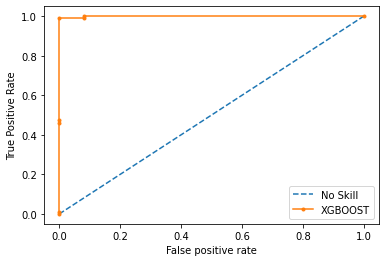

오차행렬: 
 [[ 59   3]
 [  1 108]]
정확도: 
 0.9766081871345029
정밀도: 
 0.972972972972973
재현율: 
 0.9908256880733946
F1: 
 0.9818181818181818
AUC: 
 0.9712192956496005


In [30]:
get_clt_eval(y_test,pred)

In [20]:
for a, _ in [(1,3),(2,5)]:
    print(a)
#for 문에서 써먹고 싶진 않은데, 인자를 주지 않으면 오류날때 처리용으로 사용  

1
2


In [21]:
_

5

In [22]:
for a, b in [(1,3,4),(2,5,7)]:
    print(a)
    #1과 2를 a가 받고, 3과 5를 b가 받는데 나머지 4와 7을 받을 인자가 없을때 

ValueError: too many values to unpack (expected 2)

In [24]:
for a, b, _ in [(1,3,4),(2,5,7)]:
    print(a)
    #1과 2를 a가 받고, 3과 5를 b가 받는데 나머지 4와 7을 받을 인자가 없을때 _ 사용

1
2


In [ ]:
roc_curve(y_test, ns_probs)
roc_curve(y_test, lr_probs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

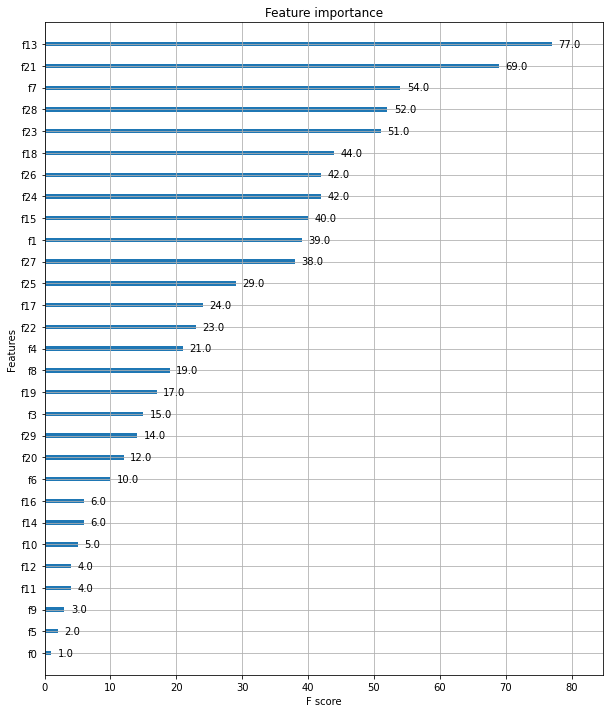

In [31]:
fig, ax = plt.subplots(figsize=(10,12)) #가로 세로 10 12

#xgb_clt모델과 ax 시각화
plot_importance(xgb_clt, ax = ax )

------

In [32]:
# 과적합 방지를 위한 early_stopping
xgb_clt = XGBClassifier(n_estimators= 400, learning_rate=0.1, max_depth = 3)

#early stoping 추가 
xgb_clt.fit(x_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=True)
#early_stopping_rounds : 100은 학습횟수대로 400번 진행하는데, 100번동안 학습률(정확도 및 그런 것들이) 변화가 없으면 끝내라. 
#eval_metric :

#100의 근거는 무엇인가? 최소 100번 이상은 시행할건데, 그 다음은 200번인가? 80번째 계속 나오다보면 180번에서도 끝날 수있다. 어디선가 계속 중간에 100회가 같아버리면 끝나버린다는 것이다. 

pred = xgb_clt.predict(x_test)
pred_proba = xgb_clt.predict_proba(x_test)

ns_probs = [0 for _ in range(len(y_test))]
roc_curve(x_test, ns_probs)

[0]	validation_0-logloss:0.61818
[1]	validation_0-logloss:0.55223
[2]	validation_0-logloss:0.49725
[3]	validation_0-logloss:0.45086
[4]	validation_0-logloss:0.41099
[5]	validation_0-logloss:0.37609
[6]	validation_0-logloss:0.34512
[7]	validation_0-logloss:0.31909
[8]	validation_0-logloss:0.29522
[9]	validation_0-logloss:0.27331
[10]	validation_0-logloss:0.25364
[11]	validation_0-logloss:0.23751
[12]	validation_0-logloss:0.22207
[13]	validation_0-logloss:0.20734
[14]	validation_0-logloss:0.19413
[15]	validation_0-logloss:0.18402
[16]	validation_0-logloss:0.17360
[17]	validation_0-logloss:0.16354
[18]	validation_0-logloss:0.15468
[19]	validation_0-logloss:0.14593
[20]	validation_0-logloss:0.13820
[21]	validation_0-logloss:0.13168
[22]	validation_0-logloss:0.12676
[23]	validation_0-logloss:0.12258
[24]	validation_0-logloss:0.11741
[25]	validation_0-logloss:0.11285
[26]	validation_0-logloss:0.10845
[27]	validation_0-logloss:0.10582
[28]	validation_0-logloss:0.10239
[29]	validation_0-loglos

ValueError: continuous-multioutput format is not supported

In [35]:
xgb_clt = XGBClassifier(n_estimators = 400 , learning_rate=0.1, max_depth=3)

xgb_clt.fit(x_train, y_train, early_stopping_rounds= 100, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=True)

pred = xgb_clt.predict(x_test)
pred_proba = xgb_clt.predict_proba(x_test)
# pred_proba[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
roc_curve(y_test, ns_probs)

[0]	validation_0-logloss:0.61818
[1]	validation_0-logloss:0.55223
[2]	validation_0-logloss:0.49725
[3]	validation_0-logloss:0.45086
[4]	validation_0-logloss:0.41099
[5]	validation_0-logloss:0.37609
[6]	validation_0-logloss:0.34512
[7]	validation_0-logloss:0.31909
[8]	validation_0-logloss:0.29522
[9]	validation_0-logloss:0.27331
[10]	validation_0-logloss:0.25364
[11]	validation_0-logloss:0.23751
[12]	validation_0-logloss:0.22207
[13]	validation_0-logloss:0.20734
[14]	validation_0-logloss:0.19413
[15]	validation_0-logloss:0.18402
[16]	validation_0-logloss:0.17360
[17]	validation_0-logloss:0.16354
[18]	validation_0-logloss:0.15468
[19]	validation_0-logloss:0.14593
[20]	validation_0-logloss:0.13820
[21]	validation_0-logloss:0.13168
[22]	validation_0-logloss:0.12676
[23]	validation_0-logloss:0.12258
[24]	validation_0-logloss:0.11741
[25]	validation_0-logloss:0.11285
[26]	validation_0-logloss:0.10845
[27]	validation_0-logloss:0.10582
[28]	validation_0-logloss:0.10239
[29]	validation_0-loglos

(array([0., 1.]), array([0., 1.]), array([1, 0]))

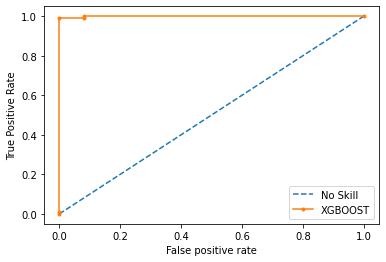

오차행렬: 
 [[ 60   2]
 [  1 108]]
정확도: 
 0.9824561403508771
정밀도: 
 0.9818181818181818
재현율: 
 0.9908256880733946
F1: 
 0.9863013698630138
AUC: 
 0.9792838117786329


In [36]:
get_clt_eval(y_test,pred)

In [37]:
#10번에 한번으로 바꿔보면? 

xgb_clt = XGBClassifier(n_estimators = 400 , learning_rate=0.1, max_depth=3)

xgb_clt.fit(x_train, y_train, early_stopping_rounds= 10, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=True)

pred = xgb_clt.predict(x_test)
pred_proba = xgb_clt.predict_proba(x_test)
# pred_proba[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
roc_curve(y_test, ns_probs)

[0]	validation_0-logloss:0.61818
[1]	validation_0-logloss:0.55223
[2]	validation_0-logloss:0.49725
[3]	validation_0-logloss:0.45086
[4]	validation_0-logloss:0.41099
[5]	validation_0-logloss:0.37609
[6]	validation_0-logloss:0.34512
[7]	validation_0-logloss:0.31909
[8]	validation_0-logloss:0.29522
[9]	validation_0-logloss:0.27331
[10]	validation_0-logloss:0.25364
[11]	validation_0-logloss:0.23751
[12]	validation_0-logloss:0.22207
[13]	validation_0-logloss:0.20734
[14]	validation_0-logloss:0.19413
[15]	validation_0-logloss:0.18402
[16]	validation_0-logloss:0.17360
[17]	validation_0-logloss:0.16354
[18]	validation_0-logloss:0.15468
[19]	validation_0-logloss:0.14593
[20]	validation_0-logloss:0.13820
[21]	validation_0-logloss:0.13168
[22]	validation_0-logloss:0.12676
[23]	validation_0-logloss:0.12258
[24]	validation_0-logloss:0.11741
[25]	validation_0-logloss:0.11285
[26]	validation_0-logloss:0.10845
[27]	validation_0-logloss:0.10582
[28]	validation_0-logloss:0.10239
[29]	validation_0-loglos

(array([0., 1.]), array([0., 1.]), array([1, 0]))

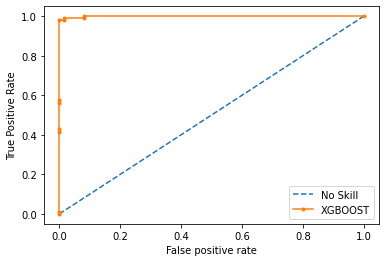

오차행렬: 
 [[ 60   2]
 [  1 108]]
정확도: 
 0.9824561403508771
정밀도: 
 0.9818181818181818
재현율: 
 0.9908256880733946
F1: 
 0.9863013698630138
AUC: 
 0.9792838117786329


In [38]:
get_clt_eval(y_test,pred)